In [1]:
#conda install -c conda-forge scikit-allel
import pandas as pd
import allel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#deletions for this project are across seven inbred mouse strains; underscore used in place of /
strain=['A_J','AKR_J','BALB_CJ','CBA_J','C3H_HeJ','DBA_2J','LP_J']

In [3]:
df_current = pd.DataFrame(columns=['strain','length'])
df = pd.DataFrame(columns=['strain','length'])


for s in strain:
    file='../Data/gold_standard/mouse_vcf/'+s+'_reference.vcf'
    callset = allel.read_vcf(file,fields='*')
    
    df_current = pd.DataFrame({'strain': s, 'length': callset['variants/SVLEN']})
    df = pd.concat([df_current, df],ignore_index=True)

/home/vs/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [4]:
df['length']=pd.to_numeric(df['length'])

In [5]:
df.to_csv('../Data/analysis_files/true_length_7_strains.csv',index=False)

# Figure 1a

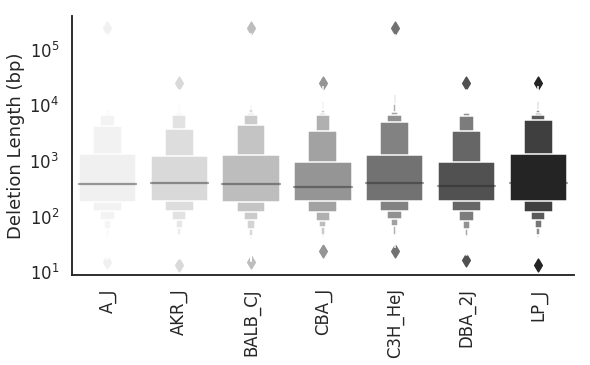

In [6]:
#average deletion length by mouse strain
fig1a=sns.set_style('white')
fig1a=sns.set_context('talk')
fig1a = sns.catplot(x='strain', y='length',kind='boxen',data=df, aspect=1.8,palette='Greys', order=['A_J', 'AKR_J', 'BALB_CJ', 'CBA_J', 'C3H_HeJ', 'DBA_2J', 'LP_J'])
fig1a.set(yscale='log');
fig1a.set(xlabel='', ylabel='Deletion Length (bp)')
fig1a=sns.despine()
plt.xticks(rotation=90)
plt.savefig("../Figures/fig1/fig1a.svg")
plt.savefig("../Figures/fig1/fig1a.eps")
plt.savefig("../Figures/fig1/fig1a", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1a.pdf", bbox_inches='tight')

In [7]:
count_row = df.shape[0]
print ("Number of SVs for 7 strains:",count_row)

Number of SVs for 7 strains: 3799


In [8]:
print ("Max deletion length")
df.max()

Max deletion length


length    239572
strain      LP_J
dtype: object

In [9]:
print (df.mean(),df.std())

length    1633.024217
dtype: float64 length    7285.812215
dtype: float64


In [10]:
deletions_per_strain=df.groupby(['strain']).count()
deletions_per_strain=deletions_per_strain.rename(columns={'length': 'n', 'B': 'c'})
deletions_per_strain.head()
deletions_per_strain.to_csv('../Data/analysis_files/SV_deletions_per_strain.csv')
print(deletions_per_strain.mean(),deletions_per_strain.std())

n    542.714286
dtype: float64 n    43.675753
dtype: float64


In [11]:
df_50_100=df.loc[(df['length'] > 50) & (df['length'] <= 100)]
df_100_500=df.loc[(df['length'] > 100) & (df['length'] <= 500)]
df_500_1000=df.loc[(df['length'] > 500) & (df['length'] <=1000)]
df_1000=df.loc[(df['length'] >1000)]

In [12]:
count_row_50_100 = df_50_100.shape[0]
count_row_100_500 = df_100_500.shape[0]
count_row_500_1000 = df_500_1000.shape[0]
count_row_1000 = df_1000.shape[0]

f=open('../Data/analysis_files/true_number_SVs_by_category.csv','w')
f.write('cat,n')
f.write('\n')
f.write('50-100,'+str(count_row_50_100))
f.write('\n')
f.write('100-500,'+str(count_row_100_500))
f.write('\n')
f.write('500-1000,'+str(count_row_500_1000))
f.write('\n')
f.write('>1000,'+str(count_row_1000))
f.write('\n')
f.close()

In [13]:
df_cat=pd.read_csv('../Data/analysis_files/true_number_SVs_by_category.csv')
df_cat['precision']=(df_cat['n']/3710)*100
df_cat.head()
%store df_cat

Stored 'df_cat' (DataFrame)


In [14]:
strain=['A_J','AKR_J','BALB_CJ','CBA_J','C3H_HeJ','DBA_2J','LP_J']

#total tools=15
tools=['BioGraph*',
'breakdancer',
'clever',
'delly',
'gasv',
'gridss',
'indelminer',
'mistrvar',
'pindel',
'popdel',
'rdxplorer',
'smoove',
'crest',
'genomestrip',
'manta_diploidSV']

In [15]:
#tool detection of deletions
df_current = pd.DataFrame(columns=['strain','length'])
df = pd.DataFrame(columns=['tool','strain','length'])

#0t.sniffles.LP_J_chr19.100p_sorted.modified.vcf
for s in strain:
    for t in tools:
        file='../Data/raw_data/mouse/custom_vcf_fulldata/0t/deletions/nf_0t.'+t+'.'+s+'.chr19.100p_sorted.modified.vcf'
        
        callset = allel.read_vcf(file,fields='*')
        # print(type(callset))
        
        if callset:
            df_current = pd.DataFrame({'tool': t, 'strain': s, 'length': callset['variants/SVLEN']})
            #print(df_current)
        
            df = pd.concat([df_current, df],ignore_index=True)
        else:
            print("Empty File: " + file)
            
#missing files: pindel.BALB_CJ and platypus.BALB_CJ
#from Varuni's files under custom_vcf_fulldata (not new)

/home/vs/.local/lib/python3.5/site-packages/allel/io/vcf_read.py:1745: UserWarning: multiple INFO headers for 'SVLEN'
  warnings.warn('multiple INFO headers for %r' % k)
/home/vs/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [16]:
#true/gold standard detection of deletions
df_current = pd.DataFrame(columns=['strain','length'])


for s in strain:
    file='../Data/gold_standard/mouse_vcf/'+s+'_reference.vcf'
    callset = allel.read_vcf(file,fields='*')
    
    df_current = pd.DataFrame({'tool': 'true deletions', 'strain': s, 'length': callset['variants/SVLEN']})
    df = pd.concat([df_current, df],ignore_index=True)

print(df)

       length strain            tool
0         730   LP_J  true deletions
1        2613   LP_J  true deletions
2        1341   LP_J  true deletions
3         226   LP_J  true deletions
4         725   LP_J  true deletions
5        2653   LP_J  true deletions
6          76   LP_J  true deletions
7         470   LP_J  true deletions
8         234   LP_J  true deletions
9         185   LP_J  true deletions
10        169   LP_J  true deletions
11        154   LP_J  true deletions
12        423   LP_J  true deletions
13        877   LP_J  true deletions
14         73   LP_J  true deletions
15        105   LP_J  true deletions
16        230   LP_J  true deletions
17        184   LP_J  true deletions
18        988   LP_J  true deletions
19       1313   LP_J  true deletions
20         75   LP_J  true deletions
21        336   LP_J  true deletions
22       7427   LP_J  true deletions
23        152   LP_J  true deletions
24         87   LP_J  true deletions
25       3895   LP_J  true deletions
2

In [17]:
df['length']=pd.to_numeric(df['length'])
df = df[df['length']>=50]


# Color-coding tools for consistency across all data figures

In [18]:
color_map = {'BioGraph*':'yellowgreen', 'breakdancer':'peru', 'clever':'gold', 'delly':'darkorange', 'delly':'mediumorchid', 
             'gasv':'firebrick', 'gridss':'cornflowerblue', 'indelminer':'forestgreen', 
             'mistrvar':'salmon', 'pindel':'darkorange', 'popdel':'navy', 'rdxplorer':'darkgray', 
             'smoove':'orangered',  'true deletions':'black',  'crest':'red', 'genomestrip':'pink','manta_diploidSV':'aqua'}

color_map1 = {'BioGraph*':'yellowgreen', 'BreakDancer':'peru', 'CLEVER':'gold', 'DELLY':'darkorange', 'DELLY':'mediumorchid', 
             'GASV':'firebrick', 'GRIDSS':'cornflowerblue', 'indelMINER':'forestgreen', 
             'MiStrVar':'salmon', 'Pindel':'darkorange', 'PopDel':'navy', 'RDXplorer':'darkgray', 
             'LUMPY':'orangered', 'true deletions':'black', 'CREST':'red', 'GenomeSTRiP':'pink','Manta':'aqua'}

test = ["true deletions", "BioGraph*","breakdancer", "clever", "delly", "gasv", 
        "gridss", "indelminer", "mistrvar", "pindel","popdel","rdxplorer", "smoove","crest","genomestrip","manta_diploidSV"]


In [19]:
%store color_map
%store color_map1

Stored 'color_map' (dict)
Stored 'color_map1' (dict)


In [20]:
%store test

Stored 'test' (list)


# Figure 1b

In [21]:
df_number=df.groupby('tool', as_index=False).count()
del df_number['strain']
df_number=df_number.rename(columns={'length': 'n'})
def convert(df_number): 
    return tuple(df_number) 

df_number

,tool,n
0,BioGraph*,3175
1,breakdancer,3542
2,clever,12773
3,crest,2156
4,delly,3910
5,gasv,82225
6,genomestrip,1537
7,gridss,4084
8,indelminer,899
9,manta_diploidSV,3845


In [22]:
x = np.arange(15)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [23]:
# #number of deletions detected by each tool
# import matplotlib.pyplot as plt; plt.rcdefaults()
# import numpy as np
# import matplotlib.pyplot as plt

# fig1b, (ax, ax2)= plt.subplots(1,2,sharey=True)

# ax.barh(width=df_number['n'], y=x)
# ax2.barh(width=df_number['n'], y=x)

# ax.set_xlim(0,20000)
# ax2.set_xlim(50000,85000) 

# plt.yticks(x, df_number['tool'])
# plt.xticks(rotation=30)
# ax.set_xlabel('Number of deletions')
# ax2.set_xlabel('Number of deletions')

# ax.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labeltop='off')
# ax2.yaxis.tick_right()
# plt.subplots_adjust(wspace=0.15)


# #d = .015
# #kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# #ax.plot((1-d,1+d), (-d,+d), **kwargs)
# #ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

# #kwargs.update(transform=ax2.transAxes)
# #ax2.plot((-d,+d), (1-d,1+d), **kwargs)
# #ax2.plot((-d,+d), (-d,+d), **kwargs)

# plt.savefig("../figures/fig1/fig1b", bbox_inches='tight')

In [24]:
df_number

,tool,n
0,BioGraph*,3175
1,breakdancer,3542
2,clever,12773
3,crest,2156
4,delly,3910
5,gasv,82225
6,genomestrip,1537
7,gridss,4084
8,indelminer,899
9,manta_diploidSV,3845


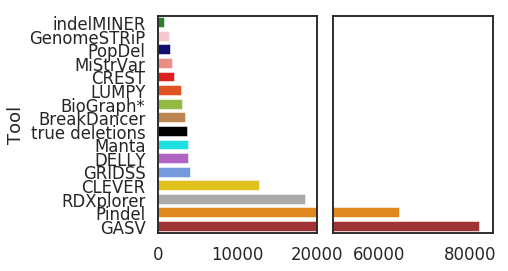

In [25]:
fig1b, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True)

fig_order = ['indelminer','genomestrip','popdel','mistrvar','crest','smoove','BioGraph*','breakdancer','true deletions','manta_diploidSV','delly','gridss','clever','rdxplorer','pindel','gasv']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

ax=sns.barplot(x='n',y='tool',data=df_number, ax=ax1, palette=pal,order=fig_order)
ax=sns.barplot(x='n',y='tool',data=df_number, ax=ax2, palette=pal,order=fig_order)
ax1.set_xlim(0,20000)
ax2.set_xlim(50000,85000)
# fig1b=sns.set_style('whitegrid')
# fig1b=sns.set_context('talk')
labels = ['indelMINER','GenomeSTRiP','PopDel','MiStrVar','CREST','LUMPY','BioGraph*','BreakDancer','true deletions','Manta','DELLY','GRIDSS','CLEVER','RDXplorer','Pindel','GASV']

ax.set_yticklabels(labels)

plt.subplots_adjust(wspace=0.1, hspace=0)
ax1.set(xlabel= '', ylabel='Tool')
ax2.set(xlabel='', ylabel='')
plt.savefig("../Figures/fig1/fig1b_break.svg", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1b_break.eps", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1b_break", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1b_break.pdf", bbox_inches='tight')

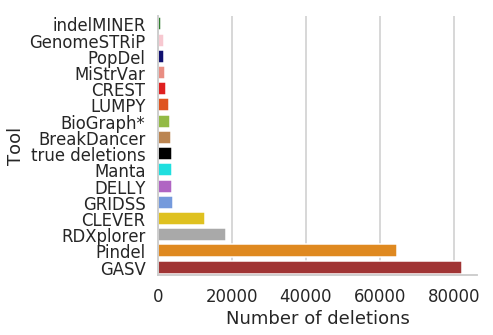

In [26]:
fig1b=sns.set_style('whitegrid')
fig1b=sns.set_context('talk')

# fig_order=["true deletions", "BioGraph*","breakdancer", "clever", "delly", "gasv", "gridss", "indelminer",  "mistrvar", "pindel","popdel","rdxplorer", "smoove", "sniffles"]
fig_order = ['indelminer','genomestrip','popdel','mistrvar','crest','smoove','BioGraph*','breakdancer','true deletions','manta_diploidSV','delly','gridss','clever','rdxplorer','pindel','gasv']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])
    
fig1b = sns.catplot(x='n', y='tool',data=df_number,kind='bar',aspect=1.5, palette=pal, order=fig_order)
fig1b.set(xlabel='Number of deletions', ylabel='Tool')
labels = ['indelMINER','GenomeSTRiP','PopDel','MiStrVar','CREST','LUMPY','BioGraph*','BreakDancer','true deletions','Manta','DELLY','GRIDSS','CLEVER','RDXplorer','Pindel','GASV']

fig1b.set_yticklabels(labels)
#fig1b.set(xscale="log");
fig1b=sns.despine()

plt.savefig("../Figures/fig1/fig1b_no_break.png", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1b.pdf", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1b.eps")
plt.savefig("../Figures/fig1/fig1b.svg")

# Figure 1c

In [27]:
# df_sum.head()

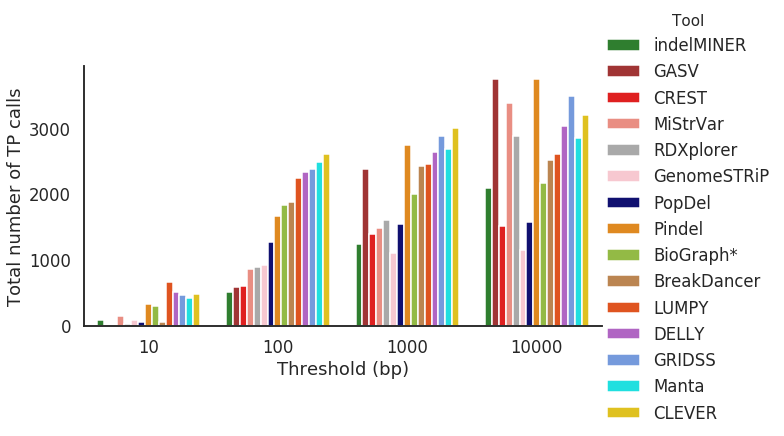

In [28]:
%store -r
fig1c=sns.set_style("white")
fig1c=sns.set_context("talk")

fig_order = ["indelminer","gasv","crest","mistrvar","rdxplorer","genomestrip","popdel","pindel","BioGraph*","breakdancer","smoove","delly","gridss","manta_diploidSV","clever"]
labels    = ["indelMINER","GASV","CREST","MiStrVar","RDXplorer","GenomeSTRiP","PopDel","Pindel","BioGraph*","BreakDancer","LUMPY","DELLY","GRIDSS","Manta","CLEVER"]
df_sum["Tool"] = df_sum["tool"].map(dict(zip(fig_order, labels)))

pal = []
for tool in fig_order:
    pal.append(color_map[tool])
    
fig1c = sns.catplot(x="threshold", y="nTP", kind="bar",data = df_sum,hue="Tool",aspect=1.8, palette=pal, hue_order=labels)
fig1c.set(xlabel='Threshold (bp)', ylabel='Total number of TP calls')

# fig1c=sns.despine()
#plt.show(fig1c)
plt.savefig("../Figures/fig1/fig1c.svg", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1c.eps", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1c", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1c.pdf", bbox_inches='tight')


In [30]:
df_sum.to_csv('../Data/analysis_files/df_sum.csv')

# Figure 1d

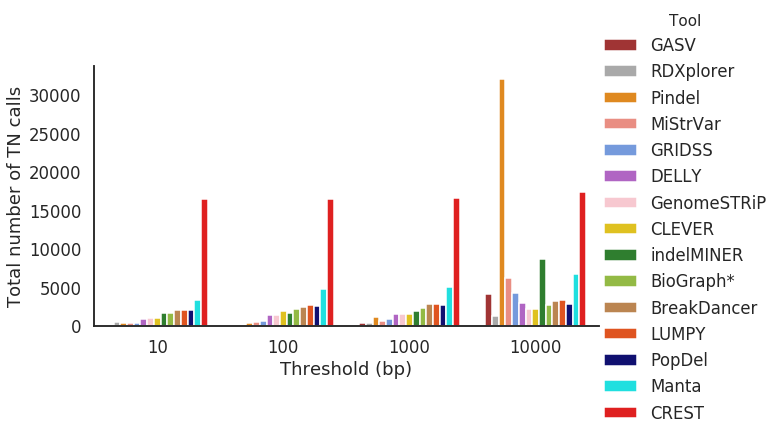

In [30]:
fig1d=sns.set_style("white")
fig1d=sns.set_context("talk")

fig_order = ["gasv","rdxplorer","pindel","mistrvar","gridss","delly","genomestrip","clever","indelminer","BioGraph*","breakdancer","smoove","popdel","manta_diploidSV","crest"]
labels    = ["GASV","RDXplorer","Pindel","MiStrVar","GRIDSS","DELLY","GenomeSTRiP","CLEVER","indelMINER","BioGraph*","BreakDancer","LUMPY","PopDel","Manta","CREST"]
df_sum["Tool"] = df_sum["tool"].map(dict(zip(fig_order, labels)))

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig1d = sns.catplot(x="threshold", y="nTN", kind="bar",data = df_sum,hue="Tool",aspect=1.8, palette=pal,hue_order=labels)
fig1d.set(xlabel='Threshold (bp)', ylabel='Total number of TN calls')
fig1d=sns.despine()
#plt.show(fig1d)

plt.savefig("../Figures/fig1/fig1d", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1d.pdf", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1d.eps")
plt.savefig("../Figures/fig1/fig1d.svg")

# Figure 1e

In [31]:
# df_sum.loc[(df_sum['threshold'] ==th)]
#df_sum


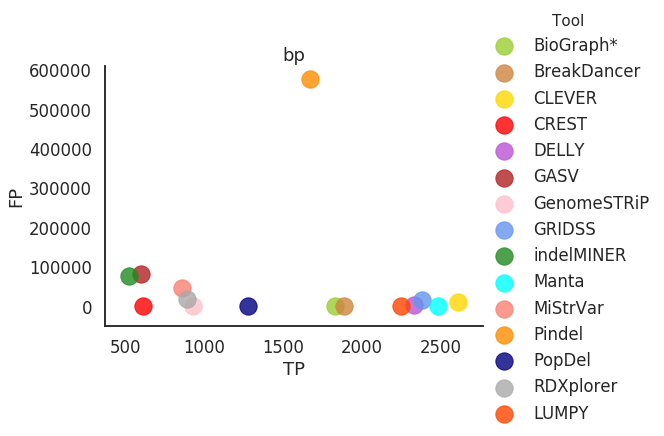

In [32]:
# fig_order = ["indelminer","gasv","mistrvar","rdxplorer","sniffles","popdel","pindel","BioGraph*","breakdancer","smoove","delly","gridss","clever"]
# labels    = ["indelminer","gasv","mistrvar","rdxplorer","sniffles","popdel","pindel","BioGraph*","breakdancer","lumpy","delly","gridss","clever"]
# df_sum["Tool"] = df_sum["tool"].map(dict(zip(fig_order, labels)))
for th in [100]:
    fig1e=sns.set_style("white")
    fig1e=sns.set_context("talk")
    fig1e=sns.lmplot(data=df_sum.loc[(df_sum['threshold'] ==th)], x='nTP', y='nFP', hue='Tool',fit_reg=False,aspect=1.5,scatter_kws={"s": 300}, palette=color_map1)
    fig1e.set(xlabel='TP', ylabel='FP')
    plt.title(str()+"bp")
    #fig1e.set(xscale="log");
    fig1e=sns.despine()
plt.savefig("../Figures/fig1/fig1e.svg", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1e.eps", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1e", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1e.pdf", bbox_inches='tight')

# Figure 1f

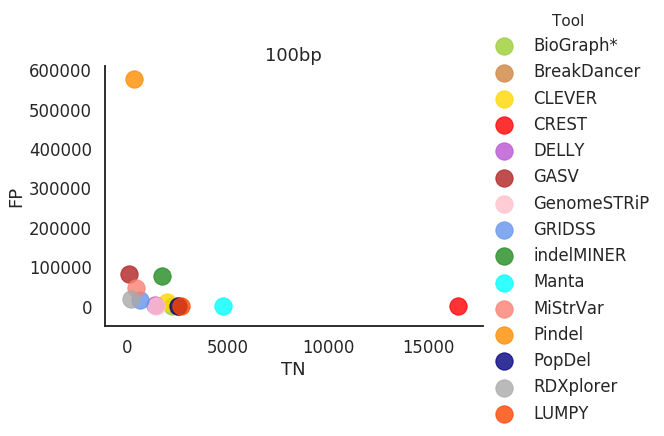

In [39]:
for th in [100]:
    fig1f=sns.set_style("white")
    fig1f=sns.set_context("talk")
    fig1f=sns.lmplot(data=df_sum.loc[(df_sum['threshold'] ==th)], x='nTN', y='nFP', hue='Tool',fit_reg=False,aspect=1.5,palette=color_map1,scatter_kws={'s': 300})
    fig1f.set(xlabel='TN', ylabel='FP')
    plt.title(str(th)+"bp")
    #fig1f.set(xscale="log");
    fig1f=sns.despine()
plt.savefig("../Figures/fig1/fig1f.svg", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1f.eps", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1f", bbox_inches='tight')
plt.savefig("../Figures/fig1/fig1f.pdf", bbox_inches='tight')

# Figure 1g

In [ ]:
# df.head()

In [ ]:
# df_new=df.sort_values("length")

In [ ]:
# df_new

In [40]:
df.to_csv('../Data/analysis_files/df_fig1.csv',index=False)

In [ ]:

# fig1g=sns.set_style("ticks")
# fig1g=sns.set_context("poster",rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30})
# labels=['Pindel','CLEVER','MiStrVar','indelMINER', 'BioGraph*','Manta','GRIDSS','BreakDancer','true deletions','LUMPY','DELLY','CREST','RDXplorer','PopDel','GASV','GenomeSTRiP']
# fig_order=['pindel','clever','mistrvar','indelminer', 'BioGraph*','manta_diploidSV','gridss','breakdancer','true deletions','smoove','delly','crest','rdxplorer','popdel','gasv','genomestrip']

# # labels    = ['true deletions','indelminer','sniffles','popdel','mistrvar','lumpy','BioGraph*','breakdancer','delly','gridss','clever','rdxplorer','pindel','gasv']
# # fig_order =['true deletions','indelminer','sniffles','popdel','mistrvar','smoove','BioGraph*','breakdancer','delly','gridss','clever','rdxplorer','pindel','gasv']
# df["Tool"] = df["tool"].map(dict(zip(fig_order, labels)))
# test=df.groupby("Tool")["length"].median()
# print(test)
# ranks = df.groupby("Tool")["length"].median().fillna(0).sort_values()[::-1].index
# print(ranks)
# pal = []
# for tool in fig_order:
#     pal.append(color_map[tool])
# fig1g = sns.catplot(x="length", y="Tool",kind='boxen',data=df.sort_values("length"),height=20, aspect=.4, palette=pal,order=labels)
# #fig1g = sns.catplot(x="tool", y="length",kind='boxen',data=df, aspect=12, palette=pal, order=fig_order)
# # fig1g.invert_yaxis()
# fig1g.set(xscale="log");
# fig1g.set(ylabel='SV-caller')
# fig1g.set(xlabel='Deletion length')
# # sns.set(rc={'figure.figsize':(1,1)})
# fig1g=sns.despine()
# plt.savefig("../figures/fig1/fig1g.svg", bbox_inches='tight')
# plt.savefig("../figures/fig1/fig1g.eps", bbox_inches='tight')
# plt.savefig("../figures/fig1/fig1g", bbox_inches='tight')
# plt.savefig("../figures/fig1/fig1g.pdf", bbox_inches='tight')